In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# CONSTANTS

In [2]:
DATASET_FILE_LOCATION = 'Dataset/multivariate_dataset/Sorted_IGBT_Data/'
FILENAME_DATASET_PREFIX = 'sorted_multivariate_IGBT_'

INDEX_TEST_IGBT = 5
colNames = ['V_ce', 'CaseTemp', 'CycleCount']
COLNAME_TARGET = 'V_ce'
INITIAL_FEED_WINDOW = 100


# Helper methods

In [3]:
existing_data = pd.DataFrame()
def update_model(model, new_data):
    # Combine existing data with new data
    combined_data = pd.concat([existing_data, new_data], ignore_index=True)
    combined_data = combined_data.sort_values(by='CycleCount')

    # Separate features and target variable
    X = combined_data.drop(columns=[COLNAME_TARGET])  # Features
    y = combined_data[COLNAME_TARGET]  # Target variable

    trainX = np.array(X)
    trainY = np.array(y).reshape(-1,1).ravel()
    
    # Retrain the model with combined data
    model.fit(trainX, trainY)
    
    return model

# Model initialization

In [4]:
# Initialize the Random Forest Regressor with specified parameters.
model_rf_both = RandomForestRegressor(n_estimators=200, 
                                      warm_start=True,
                                      random_state=42)

# Train Dataset Preparation

------------  Dataset/multivariate_dataset/Sorted_IGBT_Data/sorted_multivariate_IGBT_1.csv
------------  Dataset/multivariate_dataset/Sorted_IGBT_Data/sorted_multivariate_IGBT_2.csv
------------  Dataset/multivariate_dataset/Sorted_IGBT_Data/sorted_multivariate_IGBT_3.csv
------------  Dataset/multivariate_dataset/Sorted_IGBT_Data/sorted_multivariate_IGBT_4.csv
------------  Dataset/multivariate_dataset/Sorted_IGBT_Data/sorted_multivariate_IGBT_6.csv


/Users/zeenat/anaconda3/envs/venv_ml/lib/python3.9/site-packages/matplotlib/figure.py:456: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  warnings.warn(


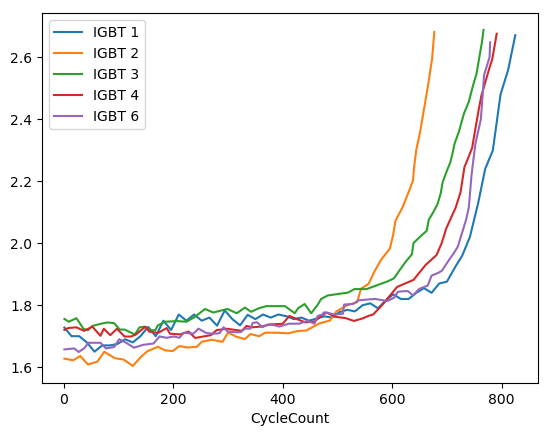

In [5]:
# Prepare training data
df_train = pd.DataFrame()
fig, ax = plt.subplots()
for i in range(1, 7):
    if i!=INDEX_TEST_IGBT:
        # Construct the file path and load the dataset.
        filename = DATASET_FILE_LOCATION + FILENAME_DATASET_PREFIX + str(i) + '.csv'
        print('------------ ', filename)
        df = pd.read_csv(filename, header=0, index_col=0)

        # Sort the dataset by 'CycleCount' to ensure data consistency.
        df = df.sort_values(by='CycleCount')

        df_train = pd.concat([df_train, df])

        # Plotting V_ce vs CycleCount for each IGBT dataset
        df.plot(ax=ax, x='CycleCount', y='V_ce', label=f'IGBT {i}')

fig.show()

# Train model

In [6]:
# Separate features and target variable
X = df_train.drop(columns=[COLNAME_TARGET])  # Features
y = df_train[COLNAME_TARGET]  # Target variable

trainX = np.array(X)
trainY = np.array(y).reshape(-1,1).ravel()

# Train the model with combined data
model_rf_both.fit(trainX, trainY)

existing_data = pd.concat([existing_data, df_train])

# Test Dataset Prep

/Users/zeenat/anaconda3/envs/venv_ml/lib/python3.9/site-packages/matplotlib/figure.py:456: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  warnings.warn(


<Figure size 1000x700 with 0 Axes>

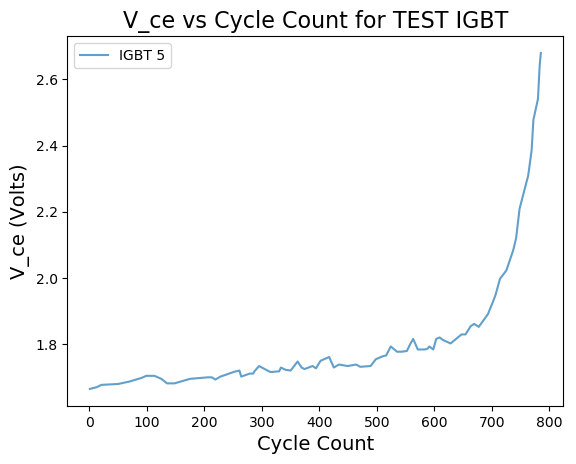

In [7]:
# Define your datasets location and the IGBT numbers to include in the plot
igbts_to_include = [INDEX_TEST_IGBT]

# Initialize a plot
plt.figure(figsize=(10, 7))
fig, ax = plt.subplots()

# Loop through each IGBT, load its dataset, and plot V_ce vs Cycle Count with a line plot
for i in igbts_to_include:
    filename = DATASET_FILE_LOCATION + FILENAME_DATASET_PREFIX + str(i) + '.csv'
    test_dataset = pd.read_csv(filename, index_col=0)

    # Sorting by 'CycleCount' to ensure the line plot makes sense
    test_dataset.sort_values('CycleCount', inplace=True)

    # Plotting with a less thick line
    test_dataset.plot(ax=ax, x='CycleCount', y='V_ce', label=f'IGBT {i}', linewidth=1.5, alpha=0.7)

# Customize the plot
plt.title('V_ce vs Cycle Count for TEST IGBT', fontsize=16)
plt.xlabel('Cycle Count', fontsize=14)
plt.ylabel('V_ce (Volts)', fontsize=14)
plt.legend()

# Show plot
fig.show()

# PREDICTION

## Multivariate

### Update model with initial feed of test data

In [8]:
# Fit initial feed
update_model(model_rf_both, test_dataset.head(INITIAL_FEED_WINDOW))

/Users/zeenat/anaconda3/envs/venv_ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:452: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


RandomForestRegressor(n_estimators=200, random_state=42, warm_start=True)

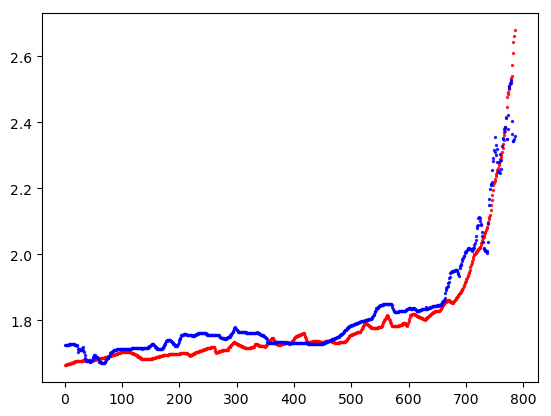

In [9]:
# Predict on rest of test dataset
predict_x = np.array(test_dataset.drop(columns=[COLNAME_TARGET]))
predict_y =  model_rf_both.predict(predict_x)

plt.scatter(test_dataset['CycleCount'], test_dataset['V_ce'], 
            color='red', 
            label='Actual data', 
            alpha=0.8, s=2)

plt.scatter(predict_x[:,1], predict_y,
            color='blue', 
            label='Predicted data', 
            alpha=0.8, s=2
            )


### 3D Scatter plot for multivariate prediction

In [10]:
import plotly.express as px

df_results_multivar = pd.DataFrame()
df_results_multivar['V_ce_offset'] = predict_y
df_results_multivar['CaseTemp_offset'] = predict_x[:,0]
df_results_multivar['cyclecount'] = predict_x[:,1]

fig = px.scatter_3d(df_results_multivar, x='cyclecount', y='CaseTemp_offset', z='V_ce_offset',
                    )
fig.update_traces(marker_size = 1)
fig.show()

## Single-variate: V_ce

In [11]:
df_offset_VCE_only = df_offset.drop(columns=['CaseTemp_offset'])

NameError: name 'df_offset' is not defined

In [ ]:
# Initial feed
initial_feed_x = df_offset_VCE_only.head(100)
initial_feed_y = test_dataset['CycleCount'].head(100)
model_rf_V_ce.fit(X = initial_feed_x, y = initial_feed_y)

In [ ]:
z = predict_x_offset['V_ce_offset'].to_numpy()

In [ ]:
# Predict on rest of test dataset
predict_x_offset = df_offset_VCE_only.iloc[101:]
predict_y_offset =  model_rf_V_ce.predict(predict_x_offset)

# plt.plot(predict_y_offset, predict_x_offset['V_ce_offset'].to_numpy(), 
#             color='blue', 
#             label='Predicted on DC-Offset Data', 
#             # alpha=0.8, s=5
#             )

plt.scatter(predict_y_offset, predict_x_offset['V_ce_offset'], 
            color='blue', 
            label='Predicted on DC-Offset Data', 
            alpha=0.8, s=5
            )